# Student Performance Prediction Project

This notebook uses various Python-based libraries to create different machine learning models to predict the grade of a student based on a number of factors.

## Data
The data that the model will be learning from and making predictions on was created by Rabie El Kharoua, and the dataset can be found on Kaggle.  
[Link to the dataset on Kaggle](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset?resource=download)

## Features
This dataset contains comprehensive information on 2,392 high school students, detailing their demographics, study habits, parental involvement, extracurricular activities, and academic performance. The target variable, `GradeClass`, classifies students' grades into distinct categories, providing a robust dataset for educational research, predictive modeling, and statistical analysis.  

### Dictionary:
* **Age**: The age of the students, ranging from 15 to 18 years.  
* **Gender**: Gender of the students, where 0 represents Male and 1 represents Female.  
* **Ethnicity**: The ethnicity of the students, coded as follows:  
  * 0: Caucasian  
  * 1: African American  
  * 2: Asian  
  * 3: Other  
* **ParentalEducation**: The education level of the parents, coded as follows:  
  * 0: None  
  * 1: High School  
  * 2: Some College  
  * 3: Bachelor's  
  * 4: Higher  
* **StudyTimeWeekly**: Weekly study time in hours, ranging from 0 to 20.  
* **Absences**: Number of absences during the school year, ranging from 0 to 30.  
* **Tutoring**: Tutoring status, where 0 indicates No and 1 indicates Yes.  
* **ParentalSupport**: The level of parental support, coded as follows:  
  * 0: None  
  * 1: Low  
  * 2: Moderate  
  * 3: High  
  * 4: Very High  
* **Extracurricular**: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.  
* **Sports**: Participation in sports, where 0 indicates No and 1 indicates Yes.  
* **Music**: Participation in music activities, where 0 indicates No and 1 indicates Yes.  
* **Volunteering**: Participation in volunteering, where 0 indicates No and 1 indicates Yes.  
* **GPA**: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.  

#### Target Variable: Grade Class
* **GradeClass**: Classification of students' grades based on GPA:  
  * 0: 'A' (GPA >= 3.5)  
  * 1: 'B' (3.0 <= GPA < 3.5)  
  * 2: 'C' (2.5 <= GPA < 3.0)  
  * 3: 'D' (2.0 <= GPA < 2.5)  
  * 4: 'F' (GPA < 2.0)

### Machine Learning Models Used:
* **RandomForestRegressor**  
* **K-Nearest Neighbors (KNN)**  
* **Logistic Regression**
* **SVC**

## Tools Used
Pandas, NumPy, Matplotlib and Scikit-Learn libraries used

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, RocCurveDisplay

## 1. Load and View Data

In [2]:
data = pd.read_csv("Student_performance_data.csv")
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:
data.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [4]:
data.shape

(2392, 15)

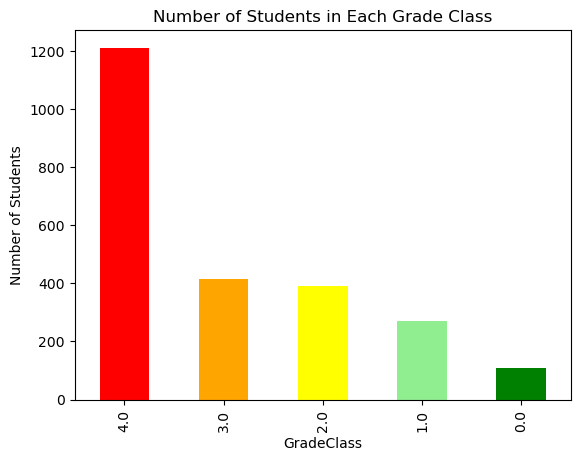

In [5]:
data["GradeClass"].value_counts().plot(kind="bar", color=["red", "orange", "yellow", "lightgreen", "green"]);
plt.title("Number of Students in Each Grade Class");
plt.ylabel("Number of Students");

In [6]:
acc = (data['GradeClass']==4.0).mean()
acc

0.5062709030100334

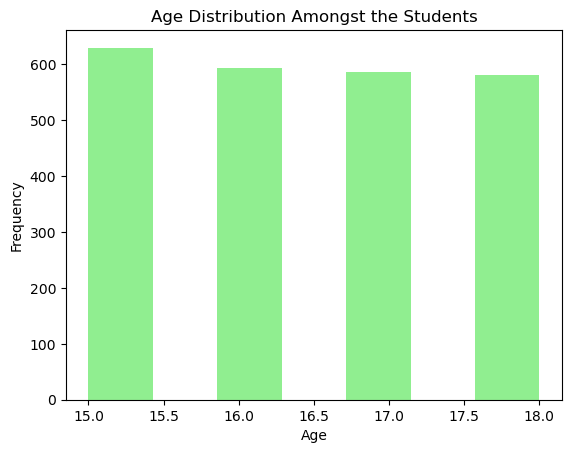

In [7]:
data.Age.plot.hist(bins=7, color="lightgreen");
plt.title("Age Distribution Amongst the Students");
plt.xlabel("Age");

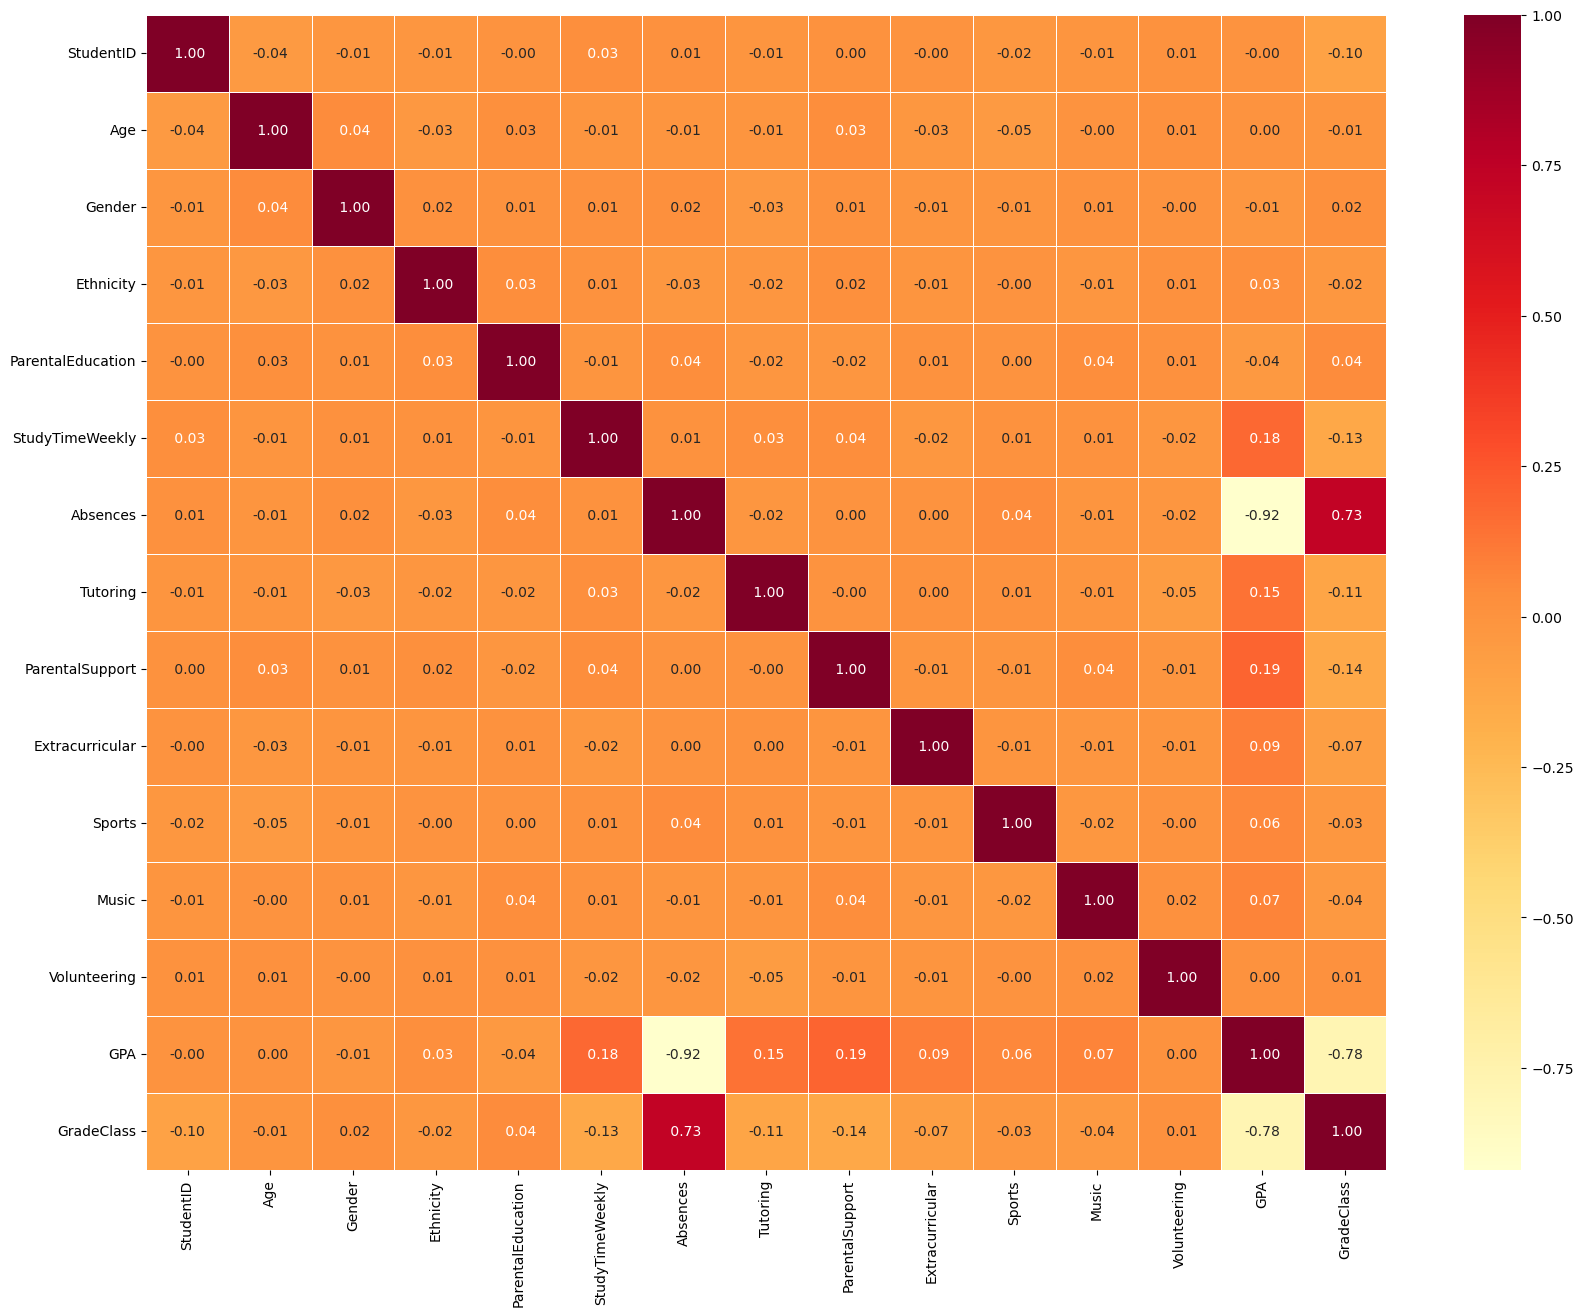

In [8]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt=" .2f", cmap="YlOrRd");

## 2. Modelling Data

In [198]:
classification_models = {"RandomForest": RandomForestClassifier(),
          "Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "SVM": svm.SVC()
                        }

In [199]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores={}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [200]:
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [201]:
X = data.drop(["StudentID", "Age", "GPA", "GradeClass"], axis=1)
X.head()

,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
0,1,0,2,19.833723,7,1,2,0,0,1,0
1,0,0,1,15.408756,0,0,1,0,0,0,0
2,0,2,3,4.210570,26,0,2,0,0,0,0
3,1,0,3,10.028829,14,0,3,1,0,0,0
4,1,0,2,4.672495,17,1,3,0,0,0,0


In [202]:
y = data["GradeClass"]
y

0       2.0
1       1.0
2       4.0
3       3.0
4       4.0
       ... 
2387    0.0
2388    4.0
2389    2.0
2390    1.0
2391    1.0
Name: GradeClass, Length: 2392, dtype: float64

In [268]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
classification_scores = fit_and_score(classification_models, X_train, X_test, y_train, y_test)
classification_scores

C:\Users\dever\Documents\sample_project_1\student_performance_prediction_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForest': 0.6991643454038997,
 'Logistic Regression': 0.7437325905292479,
 'KNN': 0.6545961002785515,
 'SVM': 0.7144846796657381}

#### Model Comparison

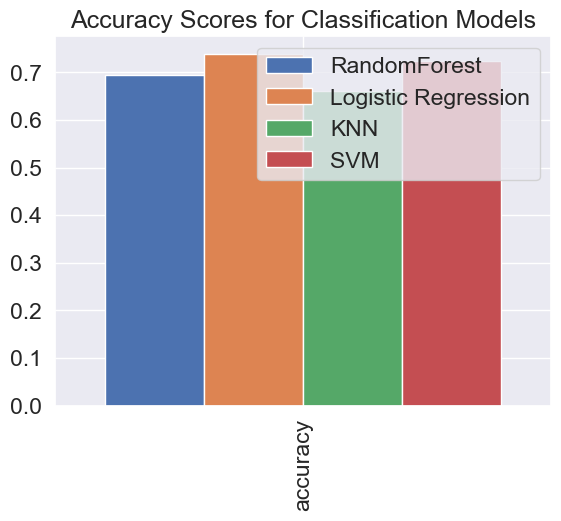

In [222]:
comparison = pd.DataFrame(classification_scores, index=["accuracy"])
comparison.plot.bar(width=2);
plt.title("Accuracy Scores for Classification Models");

#### Tuning RandomForestRegressor Model

In [728]:
rf_grid = {
    'n_estimators': np.arange(10,1000,50), 
    'max_depth': [None, 3, 6, 9], 
    'min_samples_split': np.arange(2,20,2),
    'min_samples_leaf': np.arange(1,20,2),
    'max_features': ['sqrt', 'log2', None], 
    'max_leaf_nodes': [3, 6, 9]
}

In [729]:
np.random.seed(42)
rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid,
                               n_iter=20, cv=5, verbose=True)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 6, 9],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [3, 6, 9],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [730]:
rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 9,
 'max_features': None,
 'max_depth': 6}

In [731]:
classification_scores['RandomForest']

0.6991643454038997

In [732]:
rf.score(X_test, y_test)

0.6977715877437326

In [733]:
print(f"RandomForest Best Score: {rf.score(X_test,y_test)*100:.2f}%")

RandomForest Best Score: 69.78%


#### Tuning Logistic Regression Model

In [287]:
lr_grid ={'C': np.logspace(-4, 4, 20),
          'solver': ['liblinear', 'newton-cg','lbfgs', 'saga', 'sag'],
          'max_iter'  : [100,1000,2500,5000]}

In [711]:
np.random.seed(42)
lr=GridSearchCV(LogisticRegression(), lr_grid, cv=3, verbose=2, n_jobs=-1)
lr.fit(X_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


C:\Users\dever\Documents\sample_project_1\student_performance_prediction_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga',
                                    'sag']},
             verbose=2)

In [712]:
lr.best_params_

{'C': 11.288378916846883, 'max_iter': 100, 'solver': 'lbfgs'}

In [713]:
classification_scores["Logistic Regression"]

0.7437325905292479

In [714]:
lr.score(X_test, y_test)

0.7479108635097493

In [715]:
print(f"Logistic Regression Best Score: {lr.score(X_test,y_test)*100:.2f}%")

Logistic Regression Best Score: 74.79%


#### Tuning K-Nearest Neighbors Model

K-Nearest Neighbors Max Score: 69.08%


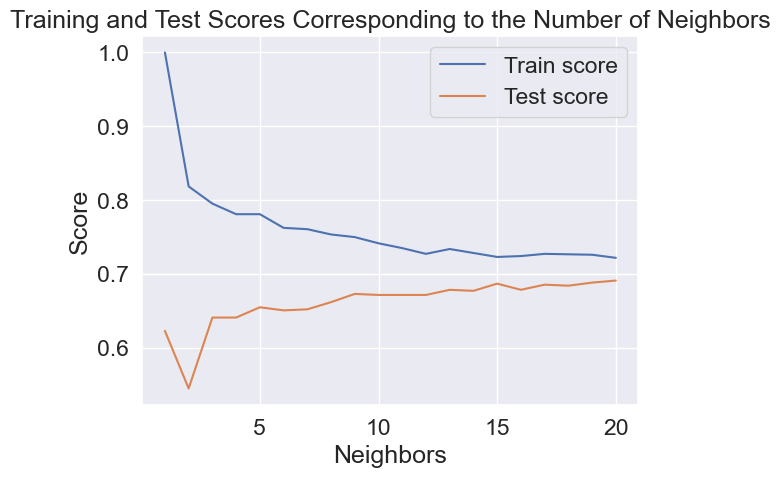

In [293]:
np.random.seed(42)
train_scores = []
test_scores = []

knn = KNeighborsClassifier()
neighbors = range(1,21)

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
plt.plot(neighbors, train_scores, label="Train score");
plt.plot(neighbors, test_scores, label="Test score");
plt.xlabel('Neighbors');
plt.ylabel('Score');
plt.title('Training and Test Scores Corresponding to the Number of Neighbors')
plt.legend()
knn_max = max(test_scores) * 100
print(f"K-Nearest Neighbors Max Score: {knn_max:.2f}%")

### Tuning SVC Model

In [693]:
svc_grid = {
   'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['rbf'],
    'gamma': [0.0001 ,0.001, 0.01, 0.1, 1]
}

class_weights = {4.0:2.0, 3.0:3.5, 2.0:3.5, 1.0:4.0, 0.0:5.0}

In [694]:
np.random.seed(42)
svc=RandomizedSearchCV(svm.SVC(class_weight=class_weights), svc_grid, cv=5, n_iter=20, verbose=True)
svc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=SVC(class_weight={0.0: 5.0, 1.0: 4.0, 2.0: 3.5,
                                               3.0: 3.5, 4.0: 2.0}),
                   n_iter=20,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                                        'kernel': ['rbf']},
                   verbose=True)

In [695]:
svc.best_params_

{'kernel': 'rbf', 'gamma': 0.001, 'C': 100}

In [696]:
classification_scores['SVM']

0.7144846796657381

In [697]:
svc.score(X_test, y_test)

0.7325905292479109

In [698]:
print(f"SVC Best Score: {svc.score(X_test,y_test)*100:.2f}%")

SVC Best Score: 73.26%


#### Model Evaluation
Let's evaluate the `SVC()` model

In [699]:
def plot_confusion_matrix(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(6,6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     fmt='g',
                     cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')

In [725]:
np.random.seed(42)
y_preds = svc.predict(X_test)
y_preds

array([4., 4., 4., 3., 3., 4., 3., 3., 1., 4., 2., 2., 3., 3., 4., 1., 4.,
       3., 4., 3., 4., 4., 3., 4., 4., 4., 4., 3., 3., 4., 1., 1., 4., 4.,
       4., 4., 4., 4., 4., 4., 1., 4., 3., 3., 4., 4., 4., 3., 3., 3., 4.,
       1., 4., 3., 1., 1., 4., 3., 4., 4., 2., 1., 4., 1., 4., 4., 3., 4.,
       4., 3., 2., 3., 1., 3., 2., 2., 3., 3., 4., 4., 4., 3., 3., 4., 4.,
       2., 4., 1., 0., 4., 3., 3., 2., 1., 4., 4., 3., 4., 4., 4., 4., 2.,
       4., 3., 4., 4., 4., 1., 4., 4., 2., 4., 3., 4., 4., 2., 4., 2., 3.,
       2., 2., 2., 3., 4., 0., 1., 4., 3., 2., 4., 3., 2., 4., 1., 3., 3.,
       3., 3., 4., 4., 3., 4., 2., 4., 4., 4., 2., 1., 1., 1., 3., 3., 4.,
       1., 4., 4., 4., 1., 4., 4., 4., 4., 4., 1., 4., 4., 4., 2., 4., 4.,
       3., 2., 4., 2., 3., 4., 2., 3., 3., 4., 4., 4., 3., 2., 3., 4., 4.,
       3., 4., 4., 4., 4., 0., 0., 4., 4., 4., 2., 4., 1., 4., 3., 3., 1.,
       2., 3., 3., 4., 4., 1., 4., 3., 2., 0., 4., 2., 2., 2., 4., 4., 4.,
       1., 3., 3., 1., 1.

In [726]:
y_test

452     4.0
1689    4.0
230     4.0
607     3.0
453     2.0
       ... 
1467    4.0
1119    4.0
1131    1.0
2317    3.0
674     4.0
Name: GradeClass, Length: 718, dtype: float64

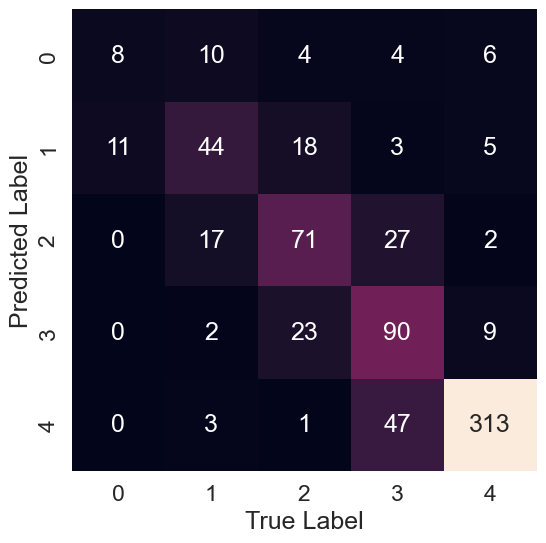

In [727]:
sns.set(font_scale=1.5)
plot_confusion_matrix(y_test, y_preds)

In [719]:
print(classification_report(y_test, y_preds, zero_division='warn'))

              precision    recall  f1-score   support

         0.0       0.50      0.16      0.24        32
         1.0       0.58      0.54      0.56        81
         2.0       0.54      0.67      0.60       117
         3.0       0.63      0.53      0.58       124
         4.0       0.90      0.95      0.92       364

    accuracy                           0.75       718
   macro avg       0.63      0.57      0.58       718
weighted avg       0.74      0.75      0.74       718



### Evaluation Metrics using Cross-Validation

In [737]:
svc.best_params_

{'kernel': 'rbf', 'gamma': 0.001, 'C': 100}

In [738]:
clf = svm.SVC(kernel='rbf', gamma=0.001, C=100, class_weight=class_weights)

In [739]:
# Cross-validated accuracy
cv_accuracy = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_accuracy=np.mean(cv_accuracy)
cv_accuracy

0.7541426088171835

In [740]:
# Cross-validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision_macro')
cv_precision=np.mean(cv_precision)
cv_precision

0.6538616517988667

In [741]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall_macro')
cv_recall=np.mean(cv_recall)
cv_recall

0.6041268680300718

In [742]:
# Cross-validated f1 score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
cv_f1=np.mean(cv_f1)
cv_f1

0.6082000985784277

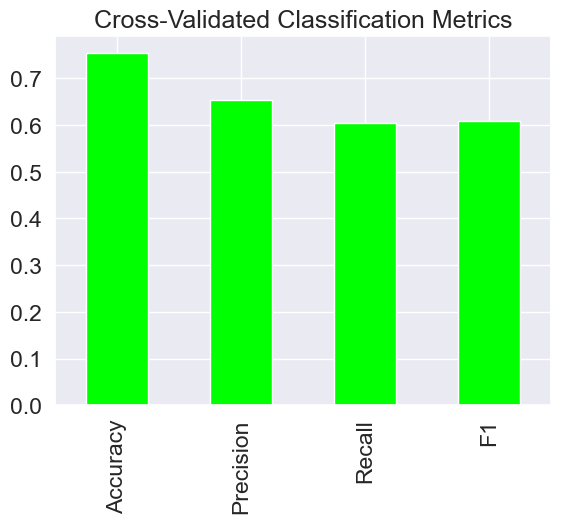

In [743]:
cv_metrics = pd.DataFrame({'Accuracy': cv_accuracy,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1': cv_f1}, index=[0])
cv_metrics.T.plot.bar(title='Cross-Validated Classification Metrics', legend=False, color='lime');

### Predicting a Student's Grade Class From User Input

In [744]:
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [745]:
student_dict = {'age': [15,16,17,18],
        'gender': {'male': 0, 'female':1},
        'ethnicity': {'caucasian':0, 'african american': 1, 'asian': 2, 'other':3},
        'parental education': {'none':0, 'high school':1, 'college':2, 'bachelors':3, 'higher':4},
        'study time': 'int',
        'absences': 'int',
        'tutoring':{'yes':1, 'no':0},
        'parental support': [0,1,2,3,4],
        'extracurricular':{'yes':1, 'no':0},
        'sports':{'yes':1, 'no':0},
        'music':{'yes':1, 'no':0},
        'volunteering':{'yes':1, 'no':0}}

grade_dict = {'0.0': 'A',
              '1.0': 'B',
              '2.0': 'C',
              '3.0': 'D',
              '4.0': 'F'}

In [746]:
def get_student_info(dict):
    age = int(input('Enter Age: (15-18)'))
    gender = input('Enter Gender: (male or female)').lower()
    ethnicity = input('Enter Ethnicity: (caucasian, african american, asian, other)').lower()
    p_edu = input('Enter Parental Education Level: (none, high school, college, bachelors, higher)').lower()
    study = int(input('Enter Study Time Weekly (Hours): '))
    absences = int(input('Enter days absent: (0-20)'))
    tutoring = input('Tutoring? (yes/no): ').lower()
    p_supp = int(input('Enter Parental Support Level (0-4): '))
    extracurr = input('Extracurricular Activities? (yes/no): ').lower()
    sports = input('Sports? (yes/no): ').lower()
    music = input('Music? (yes/no): ').lower()
    volunteering = input('Volunteering Activities? (yes/no): ').lower()
    
    info = { 
             'Gender': [dict['gender'][gender]],
             'Ethnicity': [dict['ethnicity'][ethnicity]],
             'ParentalEducation': [dict['parental education'][p_edu]],
             'StudyTimeWeekly': [study],
             'Absences':absences,
             'Tutoring':dict['tutoring'][tutoring],
             'ParentalSupport': [dict['parental support'][p_supp]],
             'Extracurricular': [dict['extracurricular'][extracurr]],
             'Sports': [dict['sports'][sports]],
             'Music': [dict['music'][music]],
             'Volunteering': dict['volunteering'][volunteering]}
    student_info = pd.DataFrame(info)
    return student_info

In [ ]:
student_info = get_student_info(student_dict)
arr = rf.predict(student_info)
predicted_gpa = str(round(arr[0],1))
print(f'\nPredicted Grade: {grade_dict[predicted_gpa]}')

Enter Age: (15-18) 17
Enter Gender: (male or female) male
Enter Ethnicity: (caucasian, african american, asian, other) asian
Enter Parental Education Level: (none, high school, college, bachelors, higher) college
Enter Study Time Weekly (Hours):  13
